### 1 - Logistic Regression

We have a a data set of the results of 2 exams and whether or not the student passes. From the above, it is desired to develop a classification model that predict the possibility of approving.

<a name="Packages"></a>
### 2 - Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

<a name="Loading and visualizing the data"></a>
### 3 - Loading and visualizing the data

<a name="Loading"></a>
### 3.1 - Loading

$X_{Train}:$ Contain the results of both exams

$Y_{Train}:$ Admission decision
* $y^{(i)}=1:$ Student admitted
* $y^{(i)}=0:$ Student not admitted

In [4]:
# Load data
filename = 'Downloads/files/ex2data1.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1)

# Array of the inputs and outputs
X_train = data[:, 0:2]
Y_train = data[:, 2]

# Use of pandas
dataSet = {"Exam 1": X_train[:, 0],
          "Exam 2": X_train[:, 1],
          "Approve": Y_train}

dp = pd.DataFrame(dataSet)
dp.head()

,Exam 1,Exam 2,Approve
0,30.286711,43.894998,0.0
1,35.847409,72.902198,0.0
2,60.182599,86.308552,1.0
3,79.032736,75.344376,1.0
4,45.083277,56.316372,0.0
5,61.106665,96.511426,1.0
6,75.024746,46.554014,1.0
7,76.098787,87.420570,1.0
8,84.432820,43.533393,1.0
9,95.861555,38.225278,0.0


<a name="Visualing the data"></a>
### 3.2 - Visualing the data

In order to understand the behavior and clustering trends, the data is plotted.

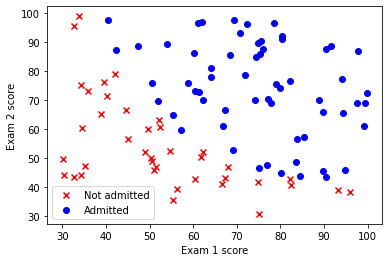

In [8]:
# Plot the data
plt.scatter(dp["Exam 1"][dp.Approve == 0], dp["Exam 2"][dp.Approve == 0],
           marker='x',
           color='red',
           label='Not admitted')

plt.scatter(dp["Exam 1"][dp.Approve == 1], dp["Exam 2"][dp.Approve == 1],
           marker='o',
           color='blue',
           label='Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()